In [1]:
import numpy as np
from numpy import linalg as la
from numpy import *
import numpy.linalg as la

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from scipy.io import loadmat
import os
import scipy.io as sio
import gc  # Import garbage collector for memory cleanup

from koopman_pseudospec_qr import KoopPseudoSpecQR
from matplotlib.colors import ListedColormap, BoundaryNorm

import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TensorFlow version: 2.10.0
GPU is available


In [2]:
# Load the specified MAT-file using scipy.io.loadmat()
file_path = 'data/pendulum_data/data_pendulum_90.mat'
data_pendulum = loadmat(file_path)

In [3]:
# Assuming the loaded MAT-file is named data_pendulum_90
X = data_pendulum['DATA_X']
Y = data_pendulum['DATA_Y']

print(X.shape)

(90000, 2)


In [4]:
len_all = X.shape[0]
data_x_train = X[:int(0.7*len_all)]
data_x_valid = X[int(0.7*len_all)+1:]

data_y_train = Y[:int(0.7*len_all)]
data_y_valid = Y[int(0.7*len_all)+1:]

data_train = [data_x_train, data_y_train]
data_valid = [data_x_valid, data_y_valid]

Processing: 1 layers with 250 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.9671e-08 - val_loss: 8.2118e-08
Epoch 2/2
2/2 [==============================] - 2s 646ms/step - loss: 3.4979e-07 - val_loss: 1.1263e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 707ms/step - loss: 1.1475e-06 - val_loss: 6.1290e-07
Epoch 2/2
2/2 [==============================] - 2s 646ms/step - loss: 6.4961e-07 - val_loss: 5.2696e-07
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 673ms/step - loss: 5.5584e-07 - val_loss: 3.3000e-07
Epoch 2/2
2/2 [==============================] - 2s 656ms/step - loss: 3.6138e-07 - val_loss: 3.6737e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 689ms/step - loss: 3.6630e-07 - val_loss: 2.6690e-07
Epoch 2/2
2/2 [==============================] - 2s 667ms/step - loss: 2.7872e-07 - val_loss: 2.0734e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [====================

100%|██████████| 3721/3721 [02:30<00:00, 24.65it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_1hlayer_250neuron.png


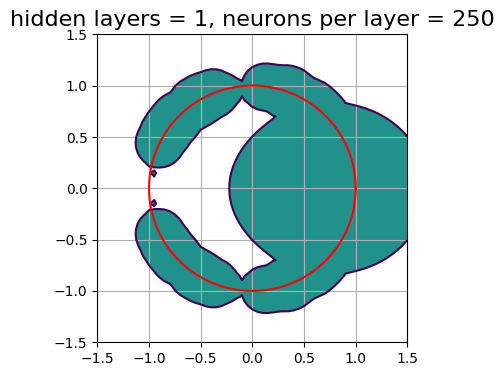

Memory cleaned
Processing: 1 layers with 275 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.5576e-08 - val_loss: 4.6285e-08
Epoch 2/2
2/2 [==============================] - 2s 637ms/step - loss: 2.8465e-07 - val_loss: 2.2044e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 675ms/step - loss: 2.0909e-06 - val_loss: 1.0800e-06
Epoch 2/2
2/2 [==============================] - 2s 648ms/step - loss: 1.1413e-06 - val_loss: 6.6009e-07
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 686ms/step - loss: 7.1264e-07 - val_loss: 6.4408e-07
Epoch 2/2
2/2 [==============================] - 2s 646ms/step - loss: 6.6342e-07 - val_loss: 4.4844e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 678ms/step - loss: 4.7649e-07 - val_loss: 4.0975e-07
Epoch 2/2
2/2 [==============================] - 2s 641ms/step - loss: 4.2324e-07 - val_loss: 2.8802e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:15<00:00, 27.46it/s]
C:\Users\xyc93\AppData\Local\Temp\ipykernel_59092\431143038.py:98: ComplexWarning: Casting complex values to real discards the imaginary part
  RES[zero_real_indices] = lower_bound + np.imag(RES[zero_real_indices]) * 1j


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_1hlayer_275neuron.png


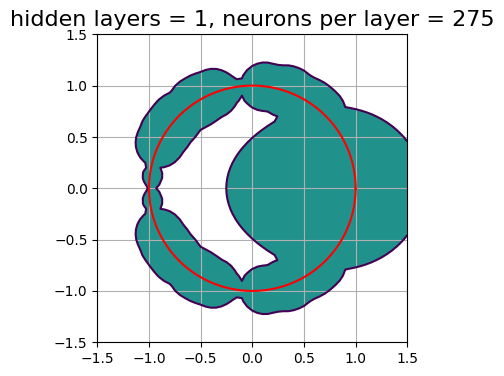

Memory cleaned
Processing: 1 layers with 300 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 3s 998ms/step - loss: 2.4006e-08 - val_loss: 9.0594e-08
Epoch 2/2
2/2 [==============================] - 2s 644ms/step - loss: 5.8583e-07 - val_loss: 1.0360e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 662ms/step - loss: 1.3801e-06 - val_loss: 2.6677e-07
Epoch 2/2
2/2 [==============================] - 2s 637ms/step - loss: 5.0498e-07 - val_loss: 1.2848e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 658ms/step - loss: 1.1380e-06 - val_loss: 7.4281e-07
Epoch 2/2
2/2 [==============================] - 2s 639ms/step - loss: 8.5338e-07 - val_loss: 2.6880e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 661ms/step - loss: 2.9130e-07 - val_loss: 7.3310e-07
Epoch 2/2
2/2 [==============================] - 2s 635ms/step - loss: 7.1535e-07 - val_loss: 9.8346e-08
Outer Epoch 5/30
Epoch 1/2
2/2 [==

100%|██████████| 3721/3721 [02:24<00:00, 25.72it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_1hlayer_300neuron.png


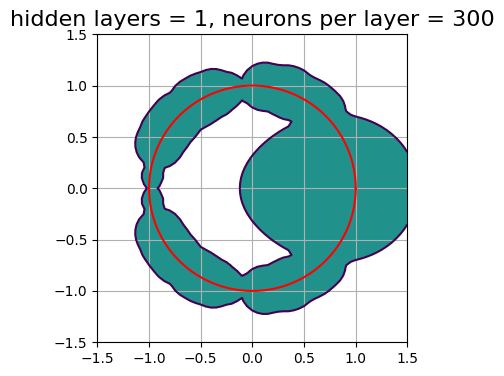

Memory cleaned
Processing: 1 layers with 325 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.6815e-08 - val_loss: 6.2427e-08
Epoch 2/2
2/2 [==============================] - 2s 740ms/step - loss: 5.2895e-07 - val_loss: 3.0185e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 752ms/step - loss: 2.8970e-06 - val_loss: 1.2833e-06
Epoch 2/2
2/2 [==============================] - 2s 702ms/step - loss: 1.4352e-06 - val_loss: 8.8496e-07
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 715ms/step - loss: 9.5979e-07 - val_loss: 9.3840e-07
Epoch 2/2
2/2 [==============================] - 2s 710ms/step - loss: 9.5231e-07 - val_loss: 6.2435e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 711ms/step - loss: 6.7881e-07 - val_loss: 5.2474e-07
Epoch 2/2
2/2 [==============================] - 2s 694ms/step - loss: 5.4314e-07 - val_loss: 4.6893e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:19<00:00, 26.65it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_1hlayer_325neuron.png


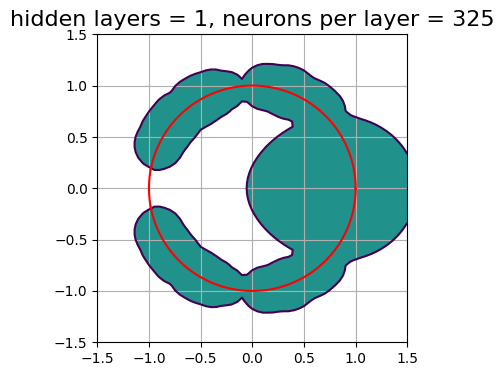

Memory cleaned
Processing: 1 layers with 350 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.5140e-08 - val_loss: 6.0573e-08
Epoch 2/2
2/2 [==============================] - 2s 697ms/step - loss: 7.3120e-07 - val_loss: 3.4071e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 720ms/step - loss: 3.4865e-06 - val_loss: 9.9614e-07
Epoch 2/2
2/2 [==============================] - 2s 695ms/step - loss: 1.3447e-06 - val_loss: 1.3953e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 715ms/step - loss: 1.3756e-06 - val_loss: 1.2391e-06
Epoch 2/2
2/2 [==============================] - 2s 694ms/step - loss: 1.3016e-06 - val_loss: 7.2332e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 720ms/step - loss: 7.7002e-07 - val_loss: 7.6186e-07
Epoch 2/2
2/2 [==============================] - 2s 690ms/step - loss: 7.9715e-07 - val_loss: 5.0258e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:23<00:00, 25.84it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_1hlayer_350neuron.png


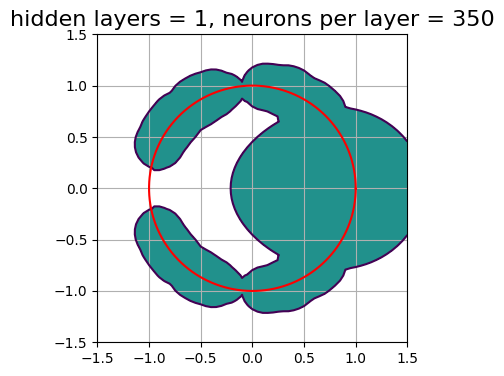

Memory cleaned
Processing: 2 layers with 250 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.1871e-08 - val_loss: 7.0399e-08
Epoch 2/2
2/2 [==============================] - 2s 677ms/step - loss: 6.7306e-07 - val_loss: 1.6010e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 725ms/step - loss: 1.8129e-06 - val_loss: 2.7977e-07
Epoch 2/2
2/2 [==============================] - 2s 672ms/step - loss: 5.9369e-07 - val_loss: 1.0164e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 715ms/step - loss: 9.2508e-07 - val_loss: 1.0191e-06
Epoch 2/2
2/2 [==============================] - 2s 678ms/step - loss: 1.0375e-06 - val_loss: 2.4785e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 694ms/step - loss: 3.3345e-07 - val_loss: 6.5541e-07
Epoch 2/2
2/2 [==============================] - 2s 694ms/step - loss: 6.1521e-07 - val_loss: 3.0427e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:39<00:00, 23.38it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_2hlayer_250neuron.png


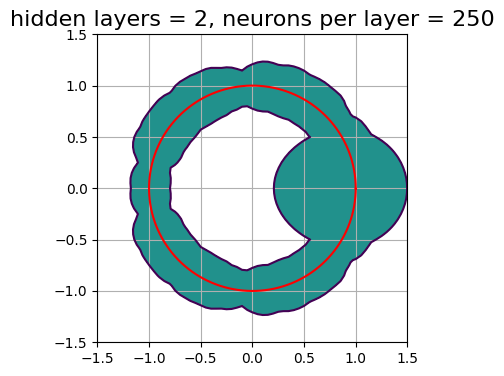

Memory cleaned
Processing: 2 layers with 275 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.1875e-08 - val_loss: 9.6229e-08
Epoch 2/2
2/2 [==============================] - 2s 697ms/step - loss: 6.9402e-07 - val_loss: 1.3058e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 721ms/step - loss: 1.6228e-06 - val_loss: 2.0556e-07
Epoch 2/2
2/2 [==============================] - 2s 697ms/step - loss: 5.0555e-07 - val_loss: 1.2463e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 722ms/step - loss: 1.0920e-06 - val_loss: 9.3577e-07
Epoch 2/2
2/2 [==============================] - 2s 697ms/step - loss: 1.0135e-06 - val_loss: 1.7455e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 723ms/step - loss: 2.4357e-07 - val_loss: 8.1386e-07
Epoch 2/2
2/2 [==============================] - 2s 699ms/step - loss: 7.5608e-07 - val_loss: 1.5770e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:46<00:00, 22.37it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_2hlayer_275neuron.png


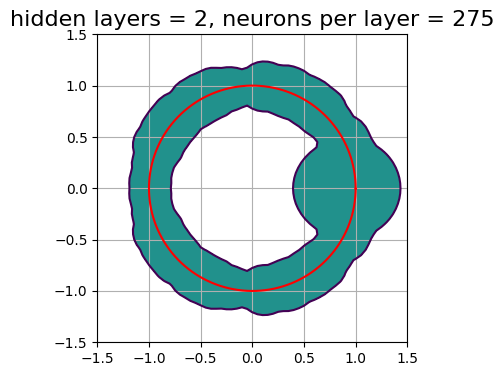

Memory cleaned
Processing: 2 layers with 300 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.3491e-08 - val_loss: 1.0058e-07
Epoch 2/2
2/2 [==============================] - 2s 734ms/step - loss: 1.0053e-06 - val_loss: 2.6237e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 767ms/step - loss: 2.9518e-06 - val_loss: 6.5328e-07
Epoch 2/2
2/2 [==============================] - 2s 744ms/step - loss: 1.0538e-06 - val_loss: 1.7909e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 752ms/step - loss: 1.6417e-06 - val_loss: 1.3465e-06
Epoch 2/2
2/2 [==============================] - 2s 726ms/step - loss: 1.4430e-06 - val_loss: 5.1135e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 748ms/step - loss: 5.9125e-07 - val_loss: 1.0282e-06
Epoch 2/2
2/2 [==============================] - 2s 730ms/step - loss: 9.9005e-07 - val_loss: 3.8913e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:43<00:00, 22.72it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_2hlayer_300neuron.png


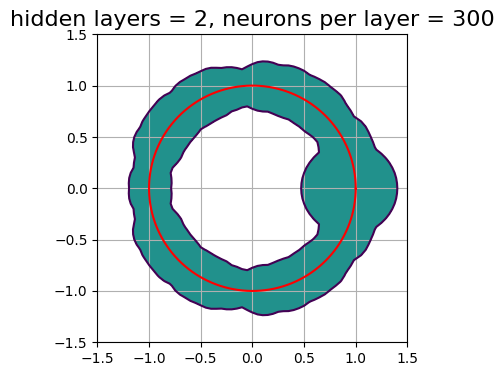

Memory cleaned
Processing: 2 layers with 325 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.0819e-08 - val_loss: 1.7773e-07
Epoch 2/2
2/2 [==============================] - 2s 793ms/step - loss: 1.5271e-06 - val_loss: 2.0653e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 819ms/step - loss: 3.0286e-06 - val_loss: 7.3539e-07
Epoch 2/2
2/2 [==============================] - 2s 784ms/step - loss: 1.1417e-06 - val_loss: 3.4976e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 847ms/step - loss: 3.1524e-06 - val_loss: 1.0246e-06
Epoch 2/2
2/2 [==============================] - 2s 803ms/step - loss: 1.4170e-06 - val_loss: 1.1893e-06
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 830ms/step - loss: 1.0941e-06 - val_loss: 1.3450e-06
Epoch 2/2
2/2 [==============================] - 2s 796ms/step - loss: 1.4448e-06 - val_loss: 4.5019e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:31<00:00, 24.59it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_2hlayer_325neuron.png


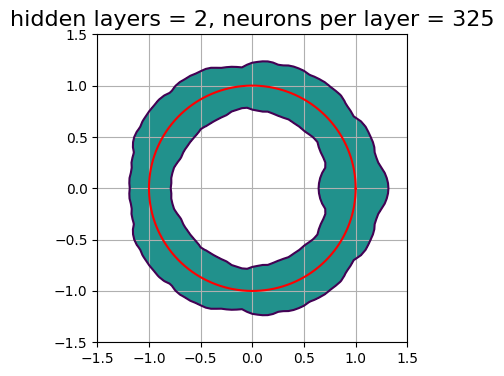

Memory cleaned
Processing: 2 layers with 350 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.2889e-08 - val_loss: 1.6959e-07
Epoch 2/2
2/2 [==============================] - 2s 808ms/step - loss: 1.7214e-06 - val_loss: 3.3792e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 836ms/step - loss: 4.2867e-06 - val_loss: 1.3370e-06
Epoch 2/2
2/2 [==============================] - 2s 806ms/step - loss: 1.7305e-06 - val_loss: 3.9125e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 832ms/step - loss: 3.6345e-06 - val_loss: 1.1447e-06
Epoch 2/2
2/2 [==============================] - 2s 818ms/step - loss: 1.5288e-06 - val_loss: 1.7689e-06
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 831ms/step - loss: 1.6427e-06 - val_loss: 1.1528e-06
Epoch 2/2
2/2 [==============================] - 2s 809ms/step - loss: 1.3450e-06 - val_loss: 8.9973e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:30<00:00, 24.71it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_2hlayer_350neuron.png


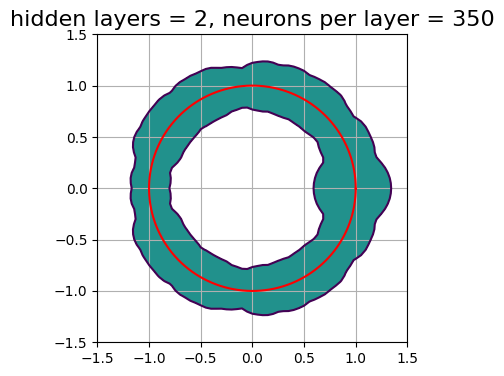

Memory cleaned
Processing: 3 layers with 250 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.7657e-08 - val_loss: 6.5465e-08
Epoch 2/2
2/2 [==============================] - 2s 727ms/step - loss: 5.7795e-07 - val_loss: 2.6444e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 761ms/step - loss: 2.7845e-06 - val_loss: 5.9885e-07
Epoch 2/2
2/2 [==============================] - 2s 727ms/step - loss: 9.7946e-07 - val_loss: 1.1862e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 751ms/step - loss: 1.1368e-06 - val_loss: 1.1797e-06
Epoch 2/2
2/2 [==============================] - 2s 727ms/step - loss: 1.2315e-06 - val_loss: 4.7628e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 751ms/step - loss: 5.2774e-07 - val_loss: 8.8240e-07
Epoch 2/2
2/2 [==============================] - 2s 728ms/step - loss: 8.5362e-07 - val_loss: 3.0330e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:27<00:00, 25.31it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_3hlayer_250neuron.png


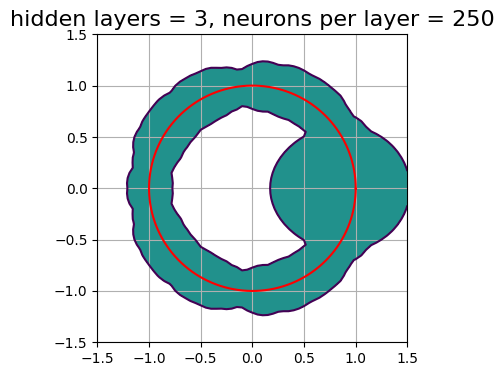

Memory cleaned
Processing: 3 layers with 275 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.4222e-08 - val_loss: 1.2838e-07
Epoch 2/2
2/2 [==============================] - 2s 801ms/step - loss: 1.2845e-06 - val_loss: 2.3721e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 822ms/step - loss: 2.9787e-06 - val_loss: 4.8331e-07
Epoch 2/2
2/2 [==============================] - 2s 803ms/step - loss: 9.7616e-07 - val_loss: 2.5185e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 822ms/step - loss: 2.2186e-06 - val_loss: 1.4129e-06
Epoch 2/2
2/2 [==============================] - 2s 804ms/step - loss: 1.6291e-06 - val_loss: 5.8328e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 826ms/step - loss: 6.1722e-07 - val_loss: 1.3935e-06
Epoch 2/2
2/2 [==============================] - 2s 803ms/step - loss: 1.3620e-06 - val_loss: 2.5582e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:29<00:00, 24.84it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_3hlayer_275neuron.png


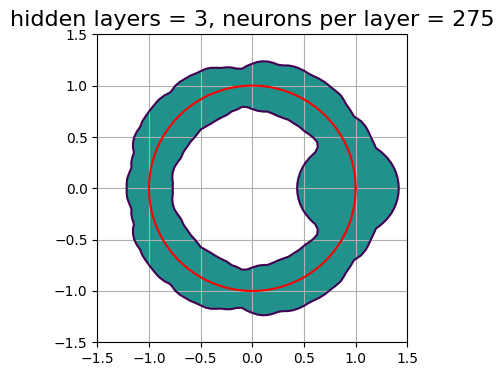

Memory cleaned
Processing: 3 layers with 300 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.3404e-08 - val_loss: 1.8543e-07
Epoch 2/2
2/2 [==============================] - 2s 840ms/step - loss: 2.3645e-06 - val_loss: 2.9499e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 3s 863ms/step - loss: 4.4423e-06 - val_loss: 1.1482e-06
Epoch 2/2
2/2 [==============================] - 2s 836ms/step - loss: 1.7084e-06 - val_loss: 5.4327e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 3s 863ms/step - loss: 4.8889e-06 - val_loss: 1.3227e-06
Epoch 2/2
2/2 [==============================] - 2s 837ms/step - loss: 1.9200e-06 - val_loss: 2.1222e-06
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 3s 862ms/step - loss: 1.8981e-06 - val_loss: 1.7311e-06
Epoch 2/2
2/2 [==============================] - 2s 838ms/step - loss: 1.9581e-06 - val_loss: 8.7414e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:30<00:00, 24.69it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_3hlayer_300neuron.png


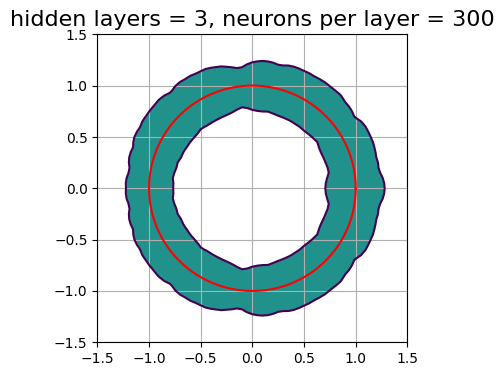

Memory cleaned
Processing: 3 layers with 325 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.1353e-08 - val_loss: 4.7533e-08
Epoch 2/2
2/2 [==============================] - 3s 915ms/step - loss: 5.9753e-07 - val_loss: 7.3199e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 3s 939ms/step - loss: 7.0748e-06 - val_loss: 2.7027e-06
Epoch 2/2
2/2 [==============================] - 3s 915ms/step - loss: 3.2417e-06 - val_loss: 2.2074e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 3s 936ms/step - loss: 2.1773e-06 - val_loss: 3.0853e-06
Epoch 2/2
2/2 [==============================] - 3s 910ms/step - loss: 2.9945e-06 - val_loss: 8.1067e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 3s 935ms/step - loss: 1.0987e-06 - val_loss: 1.5786e-06
Epoch 2/2
2/2 [==============================] - 3s 912ms/step - loss: 1.4976e-06 - val_loss: 9.4581e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:33<00:00, 24.30it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_3hlayer_325neuron.png


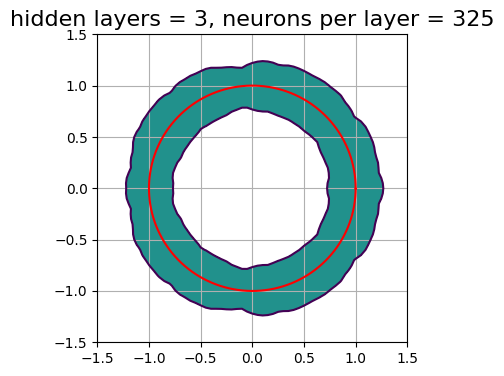

Memory cleaned
Processing: 3 layers with 350 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.0134e-08 - val_loss: 2.2761e-07
Epoch 2/2
2/2 [==============================] - 3s 929ms/step - loss: 2.8946e-06 - val_loss: 5.3541e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 3s 953ms/step - loss: 6.7452e-06 - val_loss: 2.5097e-06
Epoch 2/2
2/2 [==============================] - 3s 927ms/step - loss: 3.0531e-06 - val_loss: 5.9546e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 3s 962ms/step - loss: 5.6313e-06 - val_loss: 1.9782e-06
Epoch 2/2
2/2 [==============================] - 3s 930ms/step - loss: 2.4555e-06 - val_loss: 3.0140e-06
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 3s 960ms/step - loss: 2.8765e-06 - val_loss: 1.5478e-06
Epoch 2/2
2/2 [==============================] - 3s 930ms/step - loss: 1.8174e-06 - val_loss: 1.8781e-06
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:30<00:00, 24.75it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_3hlayer_350neuron.png


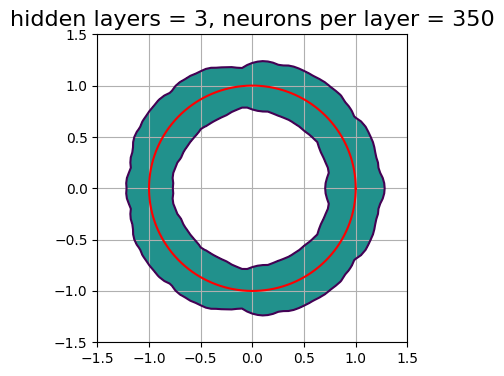

Memory cleaned
Processing: 4 layers with 250 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.3860e-08 - val_loss: 1.8068e-07
Epoch 2/2
2/2 [==============================] - 2s 789ms/step - loss: 2.2274e-06 - val_loss: 2.2127e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 2s 819ms/step - loss: 3.7511e-06 - val_loss: 1.0822e-06
Epoch 2/2
2/2 [==============================] - 2s 790ms/step - loss: 1.5405e-06 - val_loss: 5.4649e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 2s 818ms/step - loss: 4.8829e-06 - val_loss: 1.0336e-06
Epoch 2/2
2/2 [==============================] - 2s 794ms/step - loss: 1.6683e-06 - val_loss: 2.0792e-06
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 2s 816ms/step - loss: 1.8090e-06 - val_loss: 1.7032e-06
Epoch 2/2
2/2 [==============================] - 2s 794ms/step - loss: 1.9317e-06 - val_loss: 7.2700e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:26<00:00, 25.37it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_4hlayer_250neuron.png


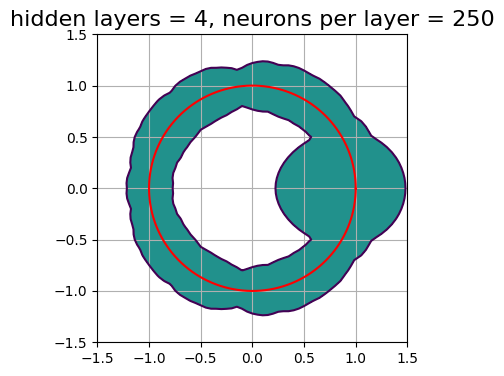

Memory cleaned
Processing: 4 layers with 275 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.2271e-08 - val_loss: 1.1095e-07
Epoch 2/2
2/2 [==============================] - 3s 886ms/step - loss: 1.7754e-06 - val_loss: 4.2876e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 3s 903ms/step - loss: 5.0566e-06 - val_loss: 5.0667e-07
Epoch 2/2
2/2 [==============================] - 3s 880ms/step - loss: 1.3811e-06 - val_loss: 3.6541e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 3s 917ms/step - loss: 3.1856e-06 - val_loss: 2.4243e-06
Epoch 2/2
2/2 [==============================] - 3s 879ms/step - loss: 2.6894e-06 - val_loss: 7.1871e-07
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 3s 901ms/step - loss: 8.1922e-07 - val_loss: 2.2296e-06
Epoch 2/2
2/2 [==============================] - 3s 881ms/step - loss: 2.1258e-06 - val_loss: 3.8112e-07
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:29<00:00, 24.81it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_4hlayer_275neuron.png


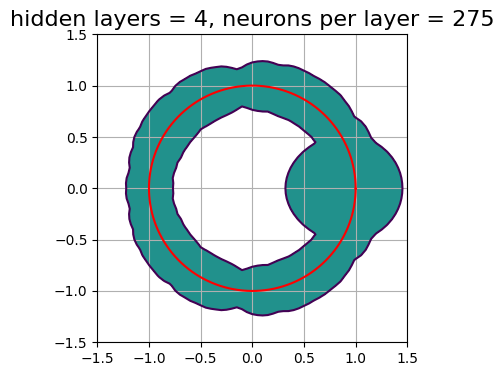

Memory cleaned
Processing: 4 layers with 300 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 2.1448e-08 - val_loss: 2.7328e-07
Epoch 2/2
2/2 [==============================] - 3s 932ms/step - loss: 3.0565e-06 - val_loss: 4.0422e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 3s 970ms/step - loss: 5.8774e-06 - val_loss: 3.0155e-06
Epoch 2/2
2/2 [==============================] - 3s 935ms/step - loss: 3.1095e-06 - val_loss: 7.2250e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 3s 955ms/step - loss: 6.8415e-06 - val_loss: 5.9712e-07
Epoch 2/2
2/2 [==============================] - 3s 933ms/step - loss: 1.3229e-06 - val_loss: 4.1433e-06
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 3s 966ms/step - loss: 3.7152e-06 - val_loss: 8.6270e-07
Epoch 2/2
2/2 [==============================] - 3s 932ms/step - loss: 1.3766e-06 - val_loss: 2.2829e-06
Outer Epoch 5/30
Epoch 1/2
2/2 [=====

100%|██████████| 3721/3721 [02:35<00:00, 23.91it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_4hlayer_300neuron.png


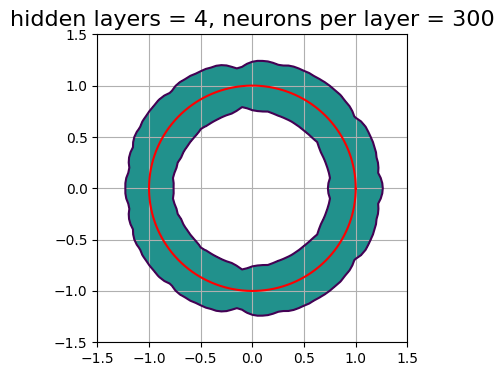

Memory cleaned
Processing: 4 layers with 325 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 5s 1s/step - loss: 2.2117e-08 - val_loss: 9.2053e-08
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 1.4981e-06 - val_loss: 8.1220e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 8.0754e-06 - val_loss: 2.2624e-06
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 3.1717e-06 - val_loss: 2.1877e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.3299e-06 - val_loss: 3.4631e-06
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 3.3410e-06 - val_loss: 1.3109e-06
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 1.6291e-06 - val_loss: 1.5448e-06
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 1.5097e-06 - val_loss: 1.4776e-06
Outer Epoch 5/30
Epoch 1/2
2/2 [==========================

100%|██████████| 3721/3721 [02:32<00:00, 24.46it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_4hlayer_325neuron.png


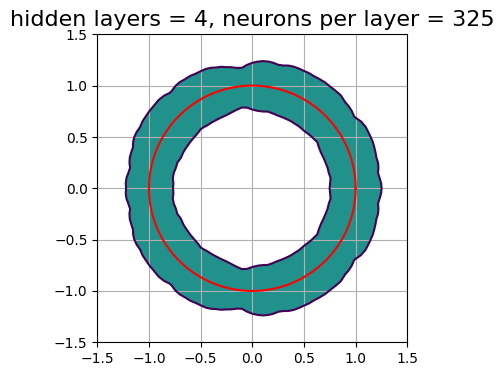

Memory cleaned
Processing: 4 layers with 350 neurons each
Outer Epoch 1/30
Epoch 1/2
2/2 [==============================] - 5s 1s/step - loss: 2.0367e-08 - val_loss: 5.8087e-08
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 9.4671e-07 - val_loss: 9.7046e-06
Outer Epoch 2/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 9.1402e-06 - val_loss: 3.5762e-06
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 4.2579e-06 - val_loss: 2.0453e-06
Outer Epoch 3/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 2.2265e-06 - val_loss: 3.8590e-06
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 3.6466e-06 - val_loss: 1.2466e-06
Outer Epoch 4/30
Epoch 1/2
2/2 [==============================] - 3s 1s/step - loss: 1.5892e-06 - val_loss: 1.8145e-06
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 1.7100e-06 - val_loss: 1.3240e-06
Outer Epoch 5/30
Epoch 1/2
2/2 [==========================

100%|██████████| 3721/3721 [02:46<00:00, 22.37it/s]


Saved plot to data/pendulum_data\extra_plot_pendulum_90_resdmd_300basis_4hlayer_350neuron.png


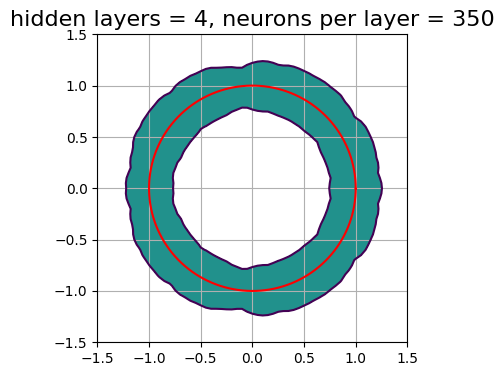

Memory cleaned
All processing completed!


In [5]:
### Train the basis using NN-resDMD and calculate the pseudospectrum in a single loop
from solver_resdmd_tf import KoopmanNN, KoopmanSolver


# Dictionary size
dic_size = 300

# List of different num_neuron values to test
num_neuron_list = [250, 275, 300, 325, 350]

# List of different number of hidden layers to test
num_hlayers_list = [1, 2, 3, 4]

# Define the folder path to save the data and create it if it doesn't exist
data_folder_path = 'data/pendulum_data'
os.makedirs(data_folder_path, exist_ok=True)

# Loop over each combination of num_neuron and num_layers
for num_layers in num_hlayers_list:
    for num_neuron in num_neuron_list:
        print(f"Processing: {num_layers} layers with {num_neuron} neurons each")
        
        # Create layer sizes list dynamically based on num_layers
        layer_sizes = [num_neuron] * num_layers
        
        # Initialize the basis function with the current parameters
        basis_function = KoopmanNN(layer_sizes=layer_sizes, n_psi_train=dic_size - 3) 
        
        # Initialize the solver with the defined basis function and target dimension from data_x_train
        solver = KoopmanSolver(dic=basis_function,
                              target_dim=np.shape(data_x_train)[-1],
                              reg=0.1)
        
        # Train the model
        solver.build(data_train=data_train,
                    data_valid=data_valid,
                    epochs=30,
                    batch_size=50000,
                    lr=1e-5,
                    log_interval=10,
                    lr_decay_factor=0.8)
        
        # Extract results from the trained model
        evalues = solver.eigenvalues.T
        efuns = solver.eigenfunctions(X)
        kpm_modes = solver.compute_mode().T
        N_dict = np.shape(evalues)[0]
        Psi_X = solver.get_Psi_X().numpy()
        Psi_Y = solver.get_Psi_Y().numpy()
        Koopman_matrix_K = solver.K.numpy()
        
        outputs = {
            'efuns': efuns,
            'evalues': evalues,
            'kpm_modes': kpm_modes,
            'N_dict': N_dict,
            'K': Koopman_matrix_K,
            'Psi_X': Psi_X,
            'Psi_Y': Psi_Y,
        }
        
        # Generate a filename that distinguishes the results by num_neuron and num_layers values
        file_path = os.path.join(data_folder_path, f'pendulum_90_resdmd_{N_dict}basis_{num_layers}hlayer_{num_neuron}neuron.mat')
        
        # Save the outputs to a .mat file
        sio.savemat(file_path, outputs)
        print(f'Saved outputs to {file_path}')

        #########################################
        # Plot the pseudospectrum immediately after training
        #########################################
        # Determine the number of rows in Psi_X
        m = Psi_X.shape[0]
        print(f"Number of rows in Psi_X: {m}")
        
        # Create a weight vector of ones
        W = np.ones((m, 1), dtype=np.double)
        
        # Compute the Gram matrix of Psi_X
        G = np.dot(Psi_X.T, Psi_X)
        print(f"Shape of G: {G.shape}")
        print('cond(G) is:', la.cond(G))
        
        # Create grid points for plotting the pseudospectrum
        x_pts = np.arange(-1.5, 1.5 + 0.05, 0.05)
        y_pts = x_pts
        x_pts_mesh, y_pts_mesh = np.meshgrid(x_pts, y_pts)
        z_pts = x_pts_mesh + 1j * y_pts_mesh
        z_pts = z_pts.ravel()
        
        # Compute the pseudospectrum using the provided function KoopPseudoSpecQR
        RES = KoopPseudoSpecQR(Psi_X, Psi_Y, W, z_pts)
        RES = RES.reshape(x_pts_mesh.shape)
        
        # Avoid division by zero: replace zero real parts with a small lower bound
        lower_bound = 1e-16
        zero_real_indices = np.nonzero(np.real(RES) == 0)
        RES[zero_real_indices] = lower_bound + np.imag(RES[zero_real_indices]) * 1j
        
        # Plot the pseudospectrum
        plt.figure(figsize=(4, 4))
        # Define levels for contouring using the logarithm of the reciprocal of the real part of RES
        v = np.array([0.25, 1e-64])
        plt.contourf(x_pts_mesh, y_pts_mesh, np.log10(1 / np.real(RES)), levels=np.log10(1 / v))
        plt.contour(x_pts_mesh, y_pts_mesh, np.log10(1 / np.real(RES)), levels=np.log10(1 / v))
        
        # Overlay a red circle (unit circle) for reference
        circle_phi = np.arange(0, 2 * np.pi, 2 * np.pi / 1000)
        plt.plot(np.cos(circle_phi), np.sin(circle_phi), color='red')
        
        # Set title with larger font size
        plt.title(f'hidden layers = {num_layers}, neurons per layer = {num_neuron}', fontsize=16)
        plt.grid()
        
        # Save the figure in the same folder as the data
        plot_filename = f'extra_plot_pendulum_90_resdmd_{N_dict}basis_{num_layers}hlayer_{num_neuron}neuron.png'
        plot_path = os.path.join(data_folder_path, plot_filename)
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f'Saved plot to {plot_path}')
        
        # Show the plot
        plt.show()
        
        # Close the figure to free memory
        plt.close()
        
        # Clean up memory
        gc.collect()
        print("Memory cleaned")

print("All processing completed!")